# CDS503 Lab 2: KNN

Not quite follow the handout. I have my own way of doing things. =D

Here are list important lines to import required libraries (KNN):

**Data Preprocessing**
- `from sklearn import preprocessing` - we use the `LabelEncoder()` and `StandardScalar()` functions

**Model Training**
- `from sklearn.model_selection import train_test_split` - we use the `train_test_split()` function
- `from sklearn.neighbors import KNeighborsClassifier` - this is the **KNN classifier**!

**Model Evaluation**
- `from sklearn import metrics` - we call `metrics.accuracy_score` function from this library.

_My helper functions are annotated with_ `# @ym_helper_classification` _after the line._

## Prepare Data

This is the pre-training phase involving data cleaning & data transformation.

In [1]:
# Import library
import pandas as pd

# This line specifies the path of "ym_helper_classification.py" file
# which contains my helper functions =D
%run "/Users/Darren Lee/ym_helper_classification"

In [2]:
# Read data
df = pd.read_csv("titanic.csv")

In [3]:
# Inspect the df shape
df.shape

(887, 8)

In [4]:
# Define the first few rows of data
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [5]:
# Rename the columns - shorten & replace capital letter - small letter
df.columns = ['survived', 'pclass', 'name', 'sex', 'age', 'sibspouse', 'parchild', 'fare']
df.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibspouse', 'parchild',
       'fare'],
      dtype='object')

In [6]:
# verify that the column names have changed
df.head()

,survived,pclass,name,sex,age,sibspouse,parchild,fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [7]:
# Drop attribute name
# axis = 1 - drop a column
df = df.drop('name', axis = 1)

In [8]:
# new cell, because you cannot rerun the previous line of code
# you have already dropped the column 'name' =D
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibspouse', 'parchild', 'fare'], dtype='object')

In [9]:
# Verify that the column 'name' has been dropped
df.head()

,survived,pclass,sex,age,sibspouse,parchild,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [10]:
# View data types
df.dtypes

survived       int64
pclass         int64
sex           object
age          float64
sibspouse      int64
parchild       int64
fare         float64
dtype: object

In [11]:
# @testlee0310: The main picture is to describe the 'survived' column in categorical format
# so we convert survived column from int64 to string

# convert integer to string
df['survived'] = df['survived'].astype(str)

# this is to display the describe for categorical column.
df['survived'].describe()

count     887
unique      2
top         0
freq      545
Name: survived, dtype: object

In [12]:
# @testlee0309: here survived : not_survived = 342 : 545
# i.e.: only 38.56% of the passengers survived

# this attribute is slightly inbalanced
df['survived'].value_counts()

0    545
1    342
Name: survived, dtype: int64

In [13]:
# ML algorithms: we need to convert certain columns from str >>> numeric.
# Here: 'pclass' only, 'sex' is a mistake

# convert integer to string
df['pclass'] = df['pclass'].astype(str)
# df['sex'] = df['sex'].astype(str)
# @testlee0310: this line can omit, 'sex' column is already a str.
# checking: type(df['sex'][0])

# inspect again the column data types
df.dtypes

survived      object
pclass        object
sex           object
age          float64
sibspouse      int64
parchild       int64
fare         float64
dtype: object

Various ML algorithms require numerical input data - represent categorical columns in numerical form.

**sex** - string >>> numbers (label encoding: mapping)

In [14]:
# This is the ML library!!!
# scikit learn
from sklearn import preprocessing

# Create labelEncoder
le = preprocessing.LabelEncoder()

# Convert string categories into numbers for sex
df['sex'] = le.fit_transform(df['sex'])

# f is 0 and m is 1.

## Train and Validate KNN Classifier

The steps are applicable for all ML model deployment.

1. Indicate target class and features
2. Split the dataset: train, validation, test data
3. Training a model (here: KNN) - using **training data**.
4. Make prediction - using **validation data**.
5. Fine-tuning model (repeat Steps 3 - 4 using different hyperparameters)
6. Model evaluation - using **test data**.

### 1. Indicate target class and features

- target: "survived"
- feature: others except "survived"

In [15]:
# Target (survived or not) - now 'survived' is categorical
target = df['survived']

# Features - drop survive
features = df.drop('survived', axis = 1)

### 2. Split the dataset

Split the dataset into 3 parts: train, validation, test sets.

In [16]:
# Before that, we need library to split datasets :D
from sklearn.model_selection import train_test_split

size = 0.2

# Split the dataset into (1) training + validation set and (2) test set.
x, x_test, y, y_test = train_test_split(features, target, test_size = size, random_state = 0)

# Split the dataset into (1a) training set and (1b) validation set.
x_train, x_dev, y_train, y_dev = train_test_split(x, y, test_size = size, random_state = 10)

# @testlee0310: just to view the dataset size after splitting
print(len(x_train))
print(len(x_dev))
print(len(x_test))

567
142
178


Note
- **test_size**: percentage of test size from 0-1 (100%)
- **random_state**: random number generator (seed - fix the random state)

### 3. Training a KNN model

In [17]:
# Training a KNN model

# Import KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with k = 1
knn = KNeighborsClassifier(n_neighbors = 1)

# Train the model using the training set
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### 4. Predict the target - using development dataset

In [18]:
# Predict the target for the deveopment dataset
dev_predict = knn.predict(x_dev)

dev_predict

array(['0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1',
       '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0',
       '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1',
       '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1',
       '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0',
       '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1'],
      dtype=object)

### 5. Evaluation

In [19]:
# Evaluation

# Import scikit-learn metrics modlue for accuracy calculation
from sklearn import metrics

# Compute the model accuracy on the dev set.
print("Accuracy: ", metrics.accuracy_score(y_dev, dev_predict))

Accuracy:  0.6971830985915493


The accuracy for `k = 1` is approx. 70%.

## Tune Parameters

For KNN (`KNeighborsClassifier()`), there are 4 hyperparameters to tune:

### `n_neighbors`

### `weights`
default: `uniform`

### `algorithm`
default: `auto`

### `p`
The "p" value of the Minkowski parameter - `1` for **Manhanttan distance**; `2` for **Euclidean distance**

### 1. Change `n_neighbors` to 5

In [20]:
# # Create a KNN classifier with k = 5
# knn = KNeighborsClassifier(n_neighbors = 5)

# # Train the model using the training set
# knn.fit(x_train, y_train)

# # Predict the target for the development set
# dev_predict = knn.predict(x_dev)

# # Compute the model accuracy on the development set: How often is the classifier correct?
# print("Accuracy: ", metrics.accuracy_score(y_dev, dev_predict))

In [21]:
_ = tune_knn(x_train, y_train, x_dev, y_dev, k = 5)  # @ym_helper_classification

Accuracy: 0.6830985915492958


### 2. Use `for` loop, for 30 times (k = 1:29)

Go back and revise this one.

Update my helper function list.

In [22]:
# # Initialize 2 empty lists (K and validation) to store the values of k and validation score
# # Initialize 1 empty dictionary (scores) to store the k:validation_score (key:value) pairs
# K = []
# validation = []
# scores = {}

# # The for loop will test k values from 1 to 29
# for k in range(1, 30):

#     clf = KNeighborsClassifier(n_neighbors = k)
#     clf.fit(x_train, y_train)
    
#     # Can also use the score() function to compute accuracy
#     # Compute accuracy by applying the model on the development set
#     validation_score = clf.score(x_dev, y_dev) # @testlee0309: this is an important line.
    
#     # Adds a single item (k value) to the list
#     K.append(k)
#     validation.append(validation_score)
    
#     # A dictionary holds key:value pairs
#     # Store the validation score for each value of k (k is the key)
#     scores[k] = [validation_score]

# # Print the key:value pairs in scores
# for keys, values in scores.items():
#     print(keys, ':', values)

In [23]:
k_list = []
validation_list = []

max_val = 0.0
k_max_val = 1

print("Find optimum k:\n")

for k in range(1,30):
    print("k: {0}\t|".format(k), end = ' ')
    _, validation = tune_knn(x_train, y_train, x_dev, y_dev, k)  # @ym_helper_classification
    
    k_list.append(k)
    validation_list.append(validation)
    
    if validation > max_val:
        max_val = validation
        k_max_val = k

print("\nThe optimum k value is {0} with validation accuracy {1}.".format(k_max_val, max_val))

Find optimum k:

k: 1	| Accuracy: 0.6971830985915493
k: 2	| Accuracy: 0.647887323943662
k: 3	| Accuracy: 0.676056338028169
k: 4	| Accuracy: 0.6690140845070423
k: 5	| Accuracy: 0.6830985915492958
k: 6	| Accuracy: 0.6619718309859155
k: 7	| Accuracy: 0.676056338028169
k: 8	| Accuracy: 0.6549295774647887
k: 9	| Accuracy: 0.6619718309859155
k: 10	| Accuracy: 0.6690140845070423
k: 11	| Accuracy: 0.6830985915492958
k: 12	| Accuracy: 0.647887323943662
k: 13	| Accuracy: 0.6619718309859155
k: 14	| Accuracy: 0.6549295774647887
k: 15	| Accuracy: 0.6830985915492958
k: 16	| Accuracy: 0.6830985915492958
k: 17	| Accuracy: 0.676056338028169
k: 18	| Accuracy: 0.6830985915492958
k: 19	| Accuracy: 0.7253521126760564
k: 20	| Accuracy: 0.7464788732394366
k: 21	| Accuracy: 0.7253521126760564
k: 22	| Accuracy: 0.7323943661971831
k: 23	| Accuracy: 0.7394366197183099
k: 24	| Accuracy: 0.7394366197183099
k: 25	| Accuracy: 0.7464788732394366
k: 26	| Accuracy: 0.7464788732394366
k: 27	| Accuracy: 0.760563380281690

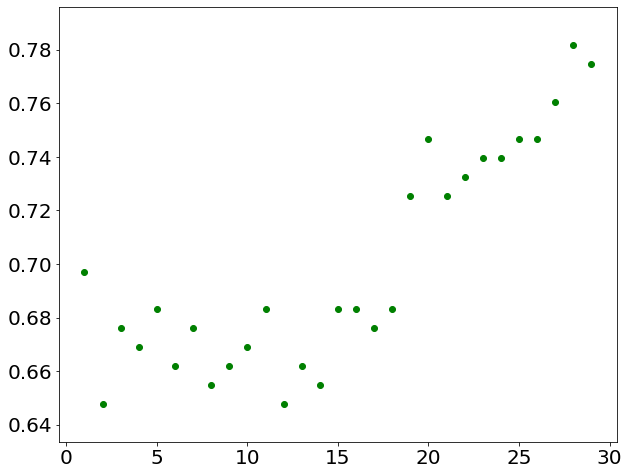

In [24]:
# Import matplotlib library
import matplotlib.pyplot as plt

# Set font and plot size to be larger
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})

plt.scatter(k_list, validation_list, color = 'g')
plt.show()

### 3. Change parameter `p` to 1.

One of the parameters in `KNeighborsClassifier()`, the `p` value, is the power parameter for the **Monkowski metric** _(as mentioned earlier)_.

- `p == 1`: the KNN model takes the _Manhanttan distance_.
- `p == 2` (default): the KNN model takes the _Euclidean distance_.

In [25]:
print("p: 2\t|", end = ' ')
_ = tune_knn(x_train, y_train, x_dev, y_dev, 28)  # @ym_helper_classification

print("p: 1\t|", end = ' ')
_ = tune_knn(x_train, y_train, x_dev, y_dev, k = 28, p_value = 1)  # @ym_helper_classification

p: 2	| Accuracy: 0.7816901408450704
p: 1	| Accuracy: 0.7605633802816901


Changing `p` from `2` to `1` does not improve the model accuracy.

## Test Model for Generalization Error

In [26]:
# The optimum k value is 28.
k_optimum = 28

# Training accuracy (using validation/development set)
print("Training Accuracy\nk: {0}\t|".format(k_optimum), end = ' ')
knn, _ = tune_knn(x_train, y_train, x_dev, y_dev, k_optimum)  # @ym_helper_classification

Training Accuracy
k: 28	| Accuracy: 0.7816901408450704


In [27]:
# Test accuracy (using test set - generalization error)
test_predict = knn.predict(x_test)

print("Test Accuracy\nk: {0}\t|".format(k_optimum), end = ' ')
_ = print_accuracy(y_test, test_predict)  # @ym_helper_classification

Test Accuracy
k: 28	| Accuracy: 0.7247191011235955


## Standardize Features

Do this and then repeat the whole process.

Here because distance between point really matter a lot in KNN, **variables that are on a large scale will have a much arger effect on the distance between the observations.**

Therefore, a standardized/normalized variable will cancel out all the bias towards such variables.

In [28]:
# Recall our features
features.head()

,pclass,sex,age,sibspouse,parchild,fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [29]:
print(features['fare'].describe())
print("\n")
print(features['age'].describe())

count    887.00000
mean      32.30542
std       49.78204
min        0.00000
25%        7.92500
50%       14.45420
75%       31.13750
max      512.32920
Name: fare, dtype: float64


count    887.000000
mean      29.471443
std       14.121908
min        0.420000
25%       20.250000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


As you can see, the range of columns "fare" and "age" are really large, i.e.:
- "fare": 0 (min) to 500+ (max), and 
- "age": 0 (min) to 80 (max),

while some of our attributes only has possible values of 0 and 1.

Therefore, our previous model is biased towards "fares" and then "age" for sure.

In [30]:
# from sklearn import preprocessing
# @testlee0310: the same library for LabelEncoder -> recall 'sex'
names = features.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit the data on the Scaler object
scaled_features = scaler.fit_transform(features)

# After standardization, scaled_features is transformed into an array
# so we need to convert it into a data frame.
scaled_features = pd.DataFrame(scaled_features, columns = names)

scaled_features.head()

,pclass,sex,age,sibspouse,parchild,fare
0,0.830524,0.740266,-0.529366,0.429904,-0.474981,-0.503586
1,-1.561277,-1.350867,0.604265,0.429904,-0.474981,0.783412
2,0.830524,-1.350867,-0.245958,-0.475856,-0.474981,-0.490020
3,-1.561277,-1.350867,0.391709,0.429904,-0.474981,0.417948
4,0.830524,0.740266,0.391709,-0.475856,-0.474981,-0.487507


In [31]:
# Now we go back to Step 2 from previous section

# from sklearn.model_selection import train_test_split
# @testlee0310: the same library used to split data.

# still using the same test_size, because we need to compare the result.
size = 0.2

# Split the dataset into (1) training + validation set and (2) test set.
x, x_test, y, y_test = train_test_split(scaled_features, target, test_size = size, random_state = 0)

# Split the dataset into (1a) training set and (1b) validation set.
x_train, x_dev, y_train, y_dev = train_test_split(x, y, test_size = size, random_state = 10)

In [32]:
# Training accuracy (using validation/development set)
print("Training accuracy")
knn, _ = tune_knn(x_train, y_train, x_dev, y_dev, 3)  # @ym_helper_classification

Training accuracy
Accuracy: 0.8380281690140845


In [33]:
# Test accuracy (using test set - generalization error)
test_predict = knn.predict(x_test)

print("Test accuracy")
_ = print_accuracy(y_test, test_predict)  # @ym_helper_classification

Test accuracy
Accuracy: 0.7752808988764045


## Export Data Frame to CSV

This one is important: why we have 'r' =D
https://datatofish.com/export-dataframe-to-csv/

'r' is to take care of any symbols within the path name, such as backslash '\' character.

### Save the original data frame

In [35]:
# View the first 5 rows of original data frame
df.head()

,survived,pclass,sex,age,sibspouse,parchild,fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [36]:
# Save the original data after data cleaning.
df.to_csv(r'titanic_unscaled.csv', index = False, header = True)
# @testlee0310: I like it, the parameter name are quite self-explaining.

### Save the scaled data frame

In [37]:
# Concatenate scaled features with target
# @testlee0310: remember that our scaled_features and target? We want to join them back together.
df_scaled = pd.concat([target, scaled_features], axis = 1)
df_scaled.head()

,survived,pclass,sex,age,sibspouse,parchild,fare
0,0,0.830524,0.740266,-0.529366,0.429904,-0.474981,-0.503586
1,1,-1.561277,-1.350867,0.604265,0.429904,-0.474981,0.783412
2,1,0.830524,-1.350867,-0.245958,-0.475856,-0.474981,-0.490020
3,1,-1.561277,-1.350867,0.391709,0.429904,-0.474981,0.417948
4,0,0.830524,0.740266,0.391709,-0.475856,-0.474981,-0.487507


In [38]:
# Save the data with scaled features and target
df_scaled.to_csv(r'titanic_scaled.csv', index = False, header = True)

In [39]:
# DONE!!!
# @testlee0310: what happened if we save it without r?
df_scaled.to_csv(r'titanic_scaled2.csv', index = False, header = True)